### ***Predictive model to determine whether a given transaction is fraudulent or not***

**Referred Links**

* https://youtu.be/NCgjcHLFNDg

* https://www.geeksforgeeks.org/how-to-convert-datetime-to-integer-in-python/

* https://analyticsindiamag.com/7-types-classification-algorithms/

**Importing Required Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import time

**Loading the dataset from json to DataFrame**

In [2]:
df = pd.read_json("transactions.txt", lines=True)
print("Time required to parse data :",time.process_time())

Time required to parse data : 31.456006267


**Taking a look at first 5 rows**

In [3]:
df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,01,rideshare,06/2023,2015-03-14,2015-03-14,414,414,1803,PURCHASE,,0.0,,,,False,,,False,False
1,737265056,737265056,5000,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,01,entertainment,02/2024,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.0,,,,True,,,False,False
2,737265056,737265056,5000,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.0,,,,False,,,False,False
3,737265056,737265056,5000,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.0,,,,False,,,False,False
4,830329091,830329091,5000,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,01,fastfood,10/2029,2015-08-06,2015-08-06,885,885,3143,PURCHASE,,0.0,,,,True,,,False,False


**Taking a look at last 5 rows**

In [4]:
df.tail()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
786358,732852505,732852505,50000,48904.96,2016-12-22T18:44:12,119.92,Lyft,US,US,90,01,rideshare,12/2022,2012-08-23,2012-08-23,936,936,3783,PURCHASE,,1095.04,,,,False,,,False,False
786359,732852505,732852505,50000,48785.04,2016-12-25T16:20:34,18.89,hulu.com,US,US,09,01,online_subscriptions,08/2023,2012-08-23,2012-08-23,939,939,3388,PURCHASE,,1214.96,,,,False,,,False,False
786360,732852505,732852505,50000,48766.15,2016-12-27T15:46:24,49.43,Lyft,US,US,02,01,rideshare,08/2025,2012-08-23,2012-08-23,936,936,3783,PURCHASE,,1233.85,,,,False,,,False,False
786361,732852505,732852505,50000,48716.72,2016-12-29T00:30:55,49.89,walmart.com,US,US,09,99,online_retail,07/2022,2012-08-23,2012-08-23,939,939,3388,PURCHASE,,1283.28,,,,False,,,False,False
786362,732852505,732852505,50000,48666.83,2016-12-30T20:10:29,72.18,Uber,US,US,05,01,rideshare,05/2024,2012-08-23,2012-08-23,939,939,3388,PURCHASE,,1333.17,,,,False,,,False,False


**Looking at Information on Dataset**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             786363 non-null  int64  
 1   customerId                786363 non-null  int64  
 2   creditLimit               786363 non-null  int64  
 3   availableMoney            786363 non-null  float64
 4   transactionDateTime       786363 non-null  object 
 5   transactionAmount         786363 non-null  float64
 6   merchantName              786363 non-null  object 
 7   acqCountry                786363 non-null  object 
 8   merchantCountryCode       786363 non-null  object 
 9   posEntryMode              786363 non-null  object 
 10  posConditionCode          786363 non-null  object 
 11  merchantCategoryCode      786363 non-null  object 
 12  currentExpDate            786363 non-null  object 
 13  accountOpenDate           786363 non-null  o

**Checking for missing values**


*   If we have any missing values we need to check and convert it into meaningful values.

*   Here we don't have any missing values.

In [6]:
df.isnull().sum()

accountNumber               0
customerId                  0
creditLimit                 0
availableMoney              0
transactionDateTime         0
transactionAmount           0
merchantName                0
acqCountry                  0
merchantCountryCode         0
posEntryMode                0
posConditionCode            0
merchantCategoryCode        0
currentExpDate              0
accountOpenDate             0
dateOfLastAddressChange     0
cardCVV                     0
enteredCVV                  0
cardLast4Digits             0
transactionType             0
echoBuffer                  0
currentBalance              0
merchantCity                0
merchantState               0
merchantZip                 0
cardPresent                 0
posOnPremises               0
recurringAuthInd            0
expirationDateKeyInMatch    0
isFraud                     0
dtype: int64

**Checking for Number of Fraud transaction and Valid transactions & Plotting graph just to visualiza the data**


*   Here we are checking for number of fraud transactions and Valid transactions.
*  Here we have 2 target variables :
    1.   0 is Valid Transaction
    2.   1 is Fraud Transaction

*   More than 98% of the data is inclined towards 1 class (Valid Transactions), and rest 2% percent is inclined towards other.

*   We cannot use this data to as input to our Machine learning model as we have very less data points for the second case.



False    773946
True      12417
Name: isFraud, dtype: int64

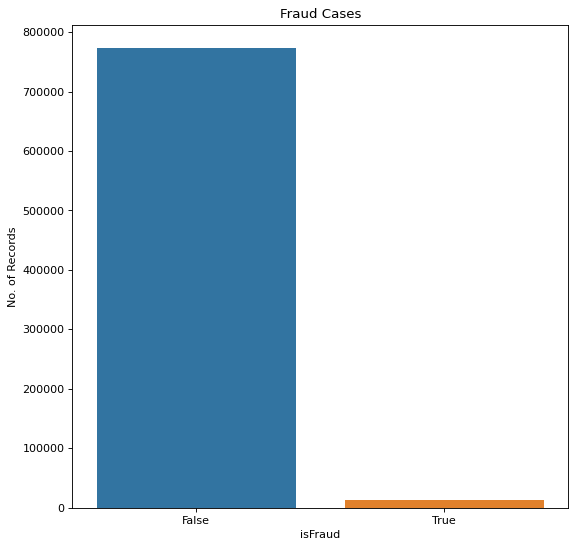

In [7]:
# plotting graph
plt.figure(figsize=(8,8), dpi= 80)
sns.countplot(data=df, x='isFraud')
plt.xlabel('isFraud')
plt.ylabel('No. of Records')
plt.title('Fraud Cases')

#counting the value
df['isFraud'].value_counts()

**What if we use the data as it is ?**

*  The dataset is highly imbalanced, if we try to give the same dataset it will always predict it's a Valid transaction each time, which we don't want to happen.

**Dropping unnecessary columns** 

In [8]:
df.drop(["posEntryMode","posConditionCode","transactionDateTime","acqCountry","merchantCountryCode","merchantName","merchantCategoryCode","currentExpDate","accountOpenDate","dateOfLastAddressChange","transactionType","merchantCity","merchantState","merchantZip","posOnPremises","recurringAuthInd","echoBuffer"], axis = 1, inplace = True)

In [9]:
df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,cardCVV,enteredCVV,cardLast4Digits,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.0,98.55,414,414,1803,0.0,False,False,False
1,737265056,737265056,5000,5000.0,74.51,486,486,767,0.0,True,False,False
2,737265056,737265056,5000,5000.0,7.47,486,486,767,0.0,False,False,False
3,737265056,737265056,5000,5000.0,7.47,486,486,767,0.0,False,False,False
4,830329091,830329091,5000,5000.0,71.18,885,885,3143,0.0,True,False,False


In [10]:
df["cardPresent"] = df['cardPresent'] * 1
df["expirationDateKeyInMatch"] = df["expirationDateKeyInMatch"] * 1
df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,cardCVV,enteredCVV,cardLast4Digits,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.0,98.55,414,414,1803,0.0,0,0,False
1,737265056,737265056,5000,5000.0,74.51,486,486,767,0.0,1,0,False
2,737265056,737265056,5000,5000.0,7.47,486,486,767,0.0,0,0,False
3,737265056,737265056,5000,5000.0,7.47,486,486,767,0.0,0,0,False
4,830329091,830329091,5000,5000.0,71.18,885,885,3143,0.0,1,0,False


**Seperating the data for analysis**

*   Checking the dataset for class values 0 and 1 which we will store in a seperate data frame.



In [11]:
valid = df[df.isFraud == 0]
fraud = df[df.isFraud == 1]

#checking the count of new variables
print("Number of Records: {} and Number of Columns: {} for valid".format(valid.shape[0],valid.shape[1]))
print("Number of Records: {} and Number of Columns: {} for fraud".format(fraud.shape[0],fraud.shape[1]))

Number of Records: 773946 and Number of Columns: 12 for valid
Number of Records: 12417 and Number of Columns: 12 for fraud


**Getting statistical data on Transaction Amount**

In [12]:
print("Statistical Data for Valid Transactions\n",valid.transactionAmount.describe(),"\n")
print("Statistical Data for Fraud Transactions\n",fraud.transactionAmount.describe())

Statistical Data for Valid Transactions
 count    773946.000000
mean        135.570249
std         146.525305
min           0.000000
25%          33.190000
50%          86.760000
75%         189.390000
max        2011.540000
Name: transactionAmount, dtype: float64 

Statistical Data for Fraud Transactions
 count    12417.000000
mean       225.215905
std        189.551393
min          0.000000
25%         86.000000
50%        176.980000
75%        311.460000
max       1608.350000
Name: transactionAmount, dtype: float64


**Observations that can be made from above data**

* We can see the mean value for Valid Transaction is 135.5 whereas for Fraud Transactions it is 225.5, which is 60% higher.
* Comparing the values of both dataframes(valid,fraud).
* With the help of this difference we can train our model to find if the transaction is Valid or not.

In [13]:
df.groupby('isFraud').mean()

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,cardCVV,enteredCVV,cardLast4Digits,currentBalance,cardPresent,expirationDateKeyInMatch
isFraud,,,,,,,,,,,
False,5.373624e+08,5.373624e+08,10754.884062,6252.455386,135.570249,544.180723,543.897110,4757.081613,4502.428675,0.451469,0.001331
True,5.291445e+08,5.291445e+08,11044.958525,6142.894186,225.215905,562.331884,562.056616,4778.372151,4902.064338,0.278248,0.001047


**Building a sample dataset**

* Using undersampling we will create a dataset containing equal number of valid and fraud transactions.

* We have 773946 Valid transactions, taking 12417 random transactions from valid so we will have equal number of fraud and valid transactions.


In [14]:
# n is number of transacions we want to pick
valid_sample = valid.sample(n=12417)

#concatinating two data frams (valid_sample and fruad) so we have equal number of records.
# axis is 0 because we don't want to add data column wise, we want to add it row wise
new_df = pd.concat([valid_sample,fraud],axis = 0)

# we can confirm the data is random by looking at the index.
print(new_df.head(10))

print(new_df.tail(10))

        accountNumber  customerId  ...  expirationDateKeyInMatch  isFraud
541111      386364078   386364078  ...                         0    False
577665      556084775   556084775  ...                         0    False
113518      236923795   236923795  ...                         0    False
214258      894938833   894938833  ...                         0    False
569146      448544073   448544073  ...                         0    False
285874      806117898   806117898  ...                         0    False
299328      206973583   206973583  ...                         0    False
415168      882831743   882831743  ...                         0    False
191501      882636604   882636604  ...                         0    False
133910      240360270   240360270  ...                         0    False

[10 rows x 12 columns]
        accountNumber  customerId  ...  expirationDateKeyInMatch  isFraud
785305      841351704   841351704  ...                         0     True
785306      84

In [15]:
# now we have same number of dataframes in both
new_df['isFraud'].value_counts()

False    12417
True     12417
Name: isFraud, dtype: int64

**Checking new dataset**

* We can check that the nature of the data has not changed by checking the mean of new dataset.

* We can still notice the same difference in mean which is seen in old dataset

* Here the mean value does not change much that means we have a good sample, if we get a huge difference in sample it means we got bad sample.

In [16]:
new_df.groupby('isFraud').mean()

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,cardCVV,enteredCVV,cardLast4Digits,currentBalance,cardPresent,expirationDateKeyInMatch
isFraud,,,,,,,,,,,
False,5.351109e+08,5.351109e+08,10761.597004,6232.227538,133.742629,547.363534,547.032214,4743.881694,4529.369466,0.453572,0.001289
True,5.291445e+08,5.291445e+08,11044.958525,6142.894186,225.215905,562.331884,562.056616,4778.372151,4902.064338,0.278248,0.001047


**Splitting data into features and targets**

* We will create 2 variables x,y and we will drop the column isFraud.
* Note : we will use axis = 1 here that is column
* And we will store ifFraud to y variable


In [17]:
X = new_df.drop(columns='isFraud',axis = 1)
Y = new_df['isFraud']

#converting true false to 0 1
Y = Y*1  
#checking x and y values
print("Values of X \n",X)
print("Values of Y \n",Y)

Values of X 
         accountNumber  customerId  ...  cardPresent  expirationDateKeyInMatch
541111      386364078   386364078  ...            0                         0
577665      556084775   556084775  ...            0                         0
113518      236923795   236923795  ...            1                         0
214258      894938833   894938833  ...            0                         0
569146      448544073   448544073  ...            1                         0
...               ...         ...  ...          ...                       ...
785680      207667444   207667444  ...            0                         0
785713      207667444   207667444  ...            1                         0
785888      428856030   428856030  ...            0                         0
786054      657364505   657364505  ...            0                         0
786112      899818521   899818521  ...            0                         0

[24834 rows x 11 columns]
Values of Y 
 541111   

**Splitting the data into training and tesing**

* We will create 4 variables X_train, X_test, Y_train, Y_test where x has the features and y has the labels.

* We will split data into x and y randomly for training and testing perpose.

* We will use test size as 20% and use 80% of the data to train the model.

* We will use stratify so that the number of 1(True) and 0(False) is evenly distributed.

* We will define Random_state = constant integer so that the train data will be constant and accuracy will be same for every run, if we don't define Random_state train data will change and accuracy also might change for every run.

**Checking the datapoints in each variable**

* X.shape Total number of data points
* Y_train used for training 
* X_test used to test 

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify= Y, random_state= 2  )

In [19]:
print(X.shape,Y_train.shape,X_test.shape)

(24834, 11) (19867,) (4967, 11)


In [20]:
X.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,cardCVV,enteredCVV,cardLast4Digits,currentBalance,cardPresent,expirationDateKeyInMatch
541111,386364078,386364078,5000,2741.39,33.76,375,375,7359,2258.61,0,0
577665,556084775,556084775,10000,9997.92,3.51,343,343,7909,2.08,0,0
113518,236923795,236923795,10000,2138.16,333.80,542,542,6916,7861.84,1,0
214258,894938833,894938833,15000,937.98,52.24,996,996,6388,14062.02,0,0
569146,448544073,448544073,2500,831.59,24.73,460,460,9244,1668.41,1,0


**Converting the values to interger**

In [21]:
#converting the values to interger
X["cardPresent"] = X["cardPresent"].astype(int)
X["expirationDateKeyInMatch"] = X["expirationDateKeyInMatch"].astype(int)

**Checking dataset before loading**

In [22]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24834 entries, 541111 to 786112
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   accountNumber             24834 non-null  int64  
 1   customerId                24834 non-null  int64  
 2   creditLimit               24834 non-null  int64  
 3   availableMoney            24834 non-null  float64
 4   transactionAmount         24834 non-null  float64
 5   cardCVV                   24834 non-null  int64  
 6   enteredCVV                24834 non-null  int64  
 7   cardLast4Digits           24834 non-null  int64  
 8   currentBalance            24834 non-null  float64
 9   cardPresent               24834 non-null  int64  
 10  expirationDateKeyInMatch  24834 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 2.3 MB


**Training Model**

* Loading instance of our model to model.
* Training the logistic regression model with training data.
* Using fit to fit data to our regression model.

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify= Y, random_state= 2  )

In [24]:
X_train.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,cardCVV,enteredCVV,cardLast4Digits,currentBalance,cardPresent,expirationDateKeyInMatch
416100,655415336,655415336,5000,3691.50,280.28,945,945,9284,1308.50,0,0
532188,812757081,812757081,500,42.51,169.26,627,627,6425,457.49,0,0
546669,307632490,307632490,1000,217.12,100.33,400,400,4434,782.88,1,0
376285,940999738,940999738,50000,48382.27,65.95,929,929,4995,1617.73,1,0
211347,894938833,894938833,15000,4856.08,401.63,689,689,9102,10143.92,0,0


### **After we have fitted and trained the data we can give the same input of variable to different algorithms.**

**Training LogisticRegression**

In [25]:
model = LogisticRegression()
svm_model = SVC()
svm_model.fit(X_train, Y_train)
model.fit(X_train,Y_train)

LogisticRegression()

**Training SVM**

In [26]:
X_train_prediction_svm = svm_model.predict(X_train)

**Training Knn**

In [27]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_train)

**Training Random Forest**

In [28]:
rfm = RandomForestClassifier(n_estimators=70, oob_score=True,n_jobs=-1,random_state=101, max_features=None, min_samples_leaf= 30)
rfm.fit(X_train,Y_train)
y_pred = rfm.predict(X_test)

**Calculating Performance**

* We will try to give only X_train first to calculate the accuracy and predect the outcome.

* Then we will compare the X_train value with Y_train to get accuracy.

In [29]:
#checking accuracy againt the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

#checking accuracy againt the test data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)


* If our accuracy against training data and against test data is neaby then our model is correct.

* If we values differ to much then our model has been underfitted or overfitted.

In [30]:
print("Accuracy of Logistic Regression :",training_data_accuracy*100,"%")

Accuracy of Logistic Regression : 49.99748326370363 %


In [31]:
training_data_accuracy_svm = accuracy_score(X_train_prediction_svm, Y_train)

In [32]:
print("Accuracy of SVM :",training_data_accuracy_svm*100,'%')

Accuracy of SVM : 50.380027180751995 %


In [33]:
training_data_accuracy_knn = accuracy_score(y_pred, Y_test)

In [34]:
print("Accuracy of Knn :",training_data_accuracy_knn*100,'%')

Accuracy of Knn : 70.24360781155627 %


In [37]:
training_data_accuracy_random = accuracy_score(y_pred, Y_test)

In [38]:
print("Accuracy of Random Forest :",training_data_accuracy_random*100,'%')

Accuracy of Random Forest : 70.24360781155627 %
